In [6]:
import matplotlib.pyplot as plt
import requests
import numpy as np 
from scipy import stats
import pandas as pd
#from config import api_key


In [7]:
city_data_gross_square_feet = pd.read_csv("../Resources/2018-2022_NYCSalesDataV2.csv")
data_frame = pd.DataFrame(city_data_gross_square_feet)
#city_data_gross_square_feet["BOROUGH"]
data_frame



,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL\nUNITS,COMMERCIAL\nUNITS,TOTAL \nUNITS,LAND \nSQUARE FEET,GROSS \nSQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS\nAT TIME OF SALE,SALE PRICE,SALE DATE
0,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,374,46,A4,347 EAST 4TH STREET,10009.0,1.0,0.0,1.0,2116.0,4400.0,1900.0,1,A4,399000.0,9/29/22
1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377,1,S2,110 AVENUE C,10009.0,2.0,1.0,3.0,1502.0,2790.0,1901.0,1,S2,2999999.0,9/15/22
2,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,16,C1,326 EAST 4TH STREET,10009.0,10.0,0.0,10.0,2204.0,8625.0,1899.0,2,C1,16800000.0,8/4/22
3,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,17,C1,328 EAST 4TH STREET,10009.0,10.0,0.0,10.0,2204.0,8625.0,1900.0,2,C1,16800000.0,8/4/22
4,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,54,C4,"719 EAST SIXTH STREET, 1B",10009.0,20.0,0.0,20.0,2302.0,9750.0,1900.0,2,C4,158822.0,9/27/22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92042,WASHINGTON HEIGHTS UPPER,46 CONDO STORE BUILDINGS,4,2164,1010,RK,4260 BROADWAY,10033.0,0.0,1.0,1.0,0.0,1218.0,0.0,4,RK,0.0,8/3/18
92043,WASHINGTON HEIGHTS UPPER,46 CONDO STORE BUILDINGS,4,2164,1011,RK,4260 BROADWAY,10033.0,0.0,1.0,1.0,0.0,522.0,0.0,4,RK,0.0,8/3/18
92044,WASHINGTON HEIGHTS UPPER,46 CONDO STORE BUILDINGS,4,2164,1012,RK,4260 BROADWAY,10033.0,0.0,1.0,1.0,0.0,1025.0,0.0,4,RK,0.0,8/3/18
92045,WASHINGTON HEIGHTS UPPER,46 CONDO STORE BUILDINGS,4,2164,1013,RK,4260 BROADWAY,10033.0,0.0,1.0,1.0,0.0,1061.0,0.0,4,RK,0.0,8/3/18


In [8]:
c_class = ['C1','C2','C3','C4','C5','C6','C7','C8','C9']
commercial_buildings = data_frame[data_frame['BUILDING CLASS AT PRESENT'].isin(c_class)]
commercial_buildings


,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL\nUNITS,COMMERCIAL\nUNITS,TOTAL \nUNITS,LAND \nSQUARE FEET,GROSS \nSQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS\nAT TIME OF SALE,SALE PRICE,SALE DATE
2,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,16,C1,326 EAST 4TH STREET,10009.0,10.0,0.0,10.0,2204.0,8625.0,1899.0,2,C1,16800000.0,8/4/22
3,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,17,C1,328 EAST 4TH STREET,10009.0,10.0,0.0,10.0,2204.0,8625.0,1900.0,2,C1,16800000.0,8/4/22
4,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,54,C4,"719 EAST SIXTH STREET, 1B",10009.0,20.0,0.0,20.0,2302.0,9750.0,1900.0,2,C4,158822.0,9/27/22
5,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,377,52,C2,271 EAST 7TH STREET,10009.0,5.0,0.0,5.0,2168.0,3728.0,1900.0,2,C2,0.0,8/5/22
6,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,377,52,C2,271 EAST 7TH STREET,10009.0,5.0,0.0,5.0,2169.0,3728.0,1900.0,2,C2,0.0,5/10/22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91791,WASHINGTON HEIGHTS UPPER,09 COOPS - WALKUP APARTMENTS,2,2162,51,C6,"143 WADSWORTH AVE, 4B",10033.0,0.0,0.0,0.0,0.0,0.0,1907.0,2,C6,1.0,4/12/18
91792,WASHINGTON HEIGHTS UPPER,09 COOPS - WALKUP APARTMENTS,2,2177,28,C6,"5 PINEHURST AVENUE, 4B",10033.0,0.0,0.0,0.0,0.0,0.0,1950.0,2,C6,400000.0,12/14/18
91793,WASHINGTON HEIGHTS UPPER,09 COOPS - WALKUP APARTMENTS,2,2177,28,C6,"752 WEST 178TH STREET, 4B",10033.0,0.0,0.0,0.0,0.0,0.0,1950.0,2,C6,832528.0,7/24/18
91794,WASHINGTON HEIGHTS UPPER,09 COOPS - WALKUP APARTMENTS,2,2177,28,C6,"5 PINEHURST AVENUE, 5A",10033.0,0.0,0.0,0.0,0.0,0.0,1950.0,2,C6,850000.0,11/29/18


In [9]:
clean_commercial_buildings = commercial_buildings.dropna(axis=0)

In [10]:
clean_commercial_buildings.copy()
clean_commercial_buildings['SALE DATE'] = pd.to_datetime(clean_commercial_buildings['SALE DATE'])
sales_data2022 = clean_commercial_buildings[clean_commercial_buildings['SALE DATE'].between('1/1/2022','12/31/2022')]
sales_data2021 = clean_commercial_buildings[clean_commercial_buildings['SALE DATE'].between('1/1/2021','12/31/2021')]
sales_data2020 = clean_commercial_buildings[clean_commercial_buildings['SALE DATE'].between('1/1/2020','12/31/2020')]
sales_data2019 = clean_commercial_buildings[clean_commercial_buildings['SALE DATE'].between('1/1/2019','12/31/2019')]
sales_data2018 = clean_commercial_buildings[clean_commercial_buildings['SALE DATE'].between('1/1/2018','12/31/2018')]

/var/folders/1v/02kbsv0j4zlb128qzg51jm9m0000gn/T/ipykernel_9965/1733995716.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  clean_commercial_buildings['SALE DATE'] = pd.to_datetime(clean_commercial_buildings['SALE DATE'])
/var/folders/1v/02kbsv0j4zlb128qzg51jm9m0000gn/T/ipykernel_9965/1733995716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_commercial_buildings['SALE DATE'] = pd.to_datetime(clean_commercial_buildings['SALE DATE'])


In [12]:
total_sale_price2022 = sales_data2022['SALE PRICE'].sum() / 1000000000
total_sale_price2021 = sales_data2021['SALE PRICE'].sum() / 1000000000
total_sale_price2020 = sales_data2020['SALE PRICE'].sum() / 1000000000
total_sale_price2019 = sales_data2019['SALE PRICE'].sum() / 1000000000
total_sale_price2018 = sales_data2018['SALE PRICE'].sum() / 1000000000
#print(total_sale_price2022)
#Average sales price 
average_price2022 = sales_data2022['SALE PRICE'].mean()
average_price2021 = sales_data2021['SALE PRICE'].mean()
average_price2020 = sales_data2020['SALE PRICE'].mean()
average_price2019 = sales_data2019['SALE PRICE'].mean()
average_price2018 = sales_data2018['SALE PRICE'].mean()

#Median Sales Price 
median_sale_price2022 = sales_data2022['SALE PRICE'].median() / 100000
median_sale_price2021 = sales_data2021['SALE PRICE'].median() / 100000
median_sale_price2020 = sales_data2020['SALE PRICE'].median() / 100000
median_sale_price2019 = sales_data2019['SALE PRICE'].median() / 100000
median_sale_price2018 = sales_data2018['SALE PRICE'].median() / 100000

five_year_sales = [total_sale_price2018,total_sale_price2019,total_sale_price2020,total_sale_price2021,total_sale_price2022]
five_year_median_sales = [median_sale_price2022, median_sale_price2021,median_sale_price2020,median_sale_price2019,median_sale_price2018]
print(five_year_median_sales)

[9.447555, 30.05, 0.28925, 0.3107, 4.85]


In [13]:
five_year_sales_dic ={"2018" : total_sale_price2018,
                      "2019" : total_sale_price2019,
                      "2020" : total_sale_price2020,
                      "2021" : total_sale_price2021,
                      "2022" : total_sale_price2022}
five_yearsofsales = pd.DataFrame.from_dict(five_year_sales_dic, orient='index')

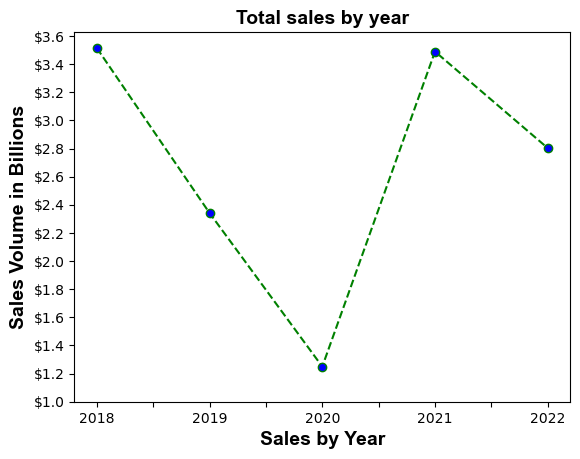

In [14]:
df = five_yearsofsales.plot(color='green', linestyle='--', marker='o', markerfacecolor='blue', markersize=6)
csfont = {'fontname':'Arial','color':'black',
        'weight' : 'bold', 'size'   : 14}
vfont = {'fontname':'Arial','color':'black',
        'weight' : 'bold', 'size'   : 14}
plt.ylabel('Sales Volume in Billions', **vfont) 
plt.xlabel('Sales by Year', **csfont) 
df.set_title("Total sales by year", **csfont)
plt.yticks(np.arange(1.0, 3.8, step=0.2))
df.get_legend().remove()
df.yaxis.set_major_formatter('${x:1.1f}')


In [16]:
five_year_median_sales_dic ={"2018" : median_sale_price2018,
                      "2019" : median_sale_price2019,
                      "2020" : median_sale_price2020,
                      "2021" : median_sale_price2021,
                      "2022" : median_sale_price2022}
five_year_median_sales = pd.DataFrame.from_dict(five_year_median_sales_dic, orient='index')

NameError: name 'five_year_median_sales_dic' is not defined

In [17]:
df = five_year_median_sales.plot(color='orange', linestyle='--', marker='o', markerfacecolor='blue', markersize=6)
csfont = {'fontname':'Arial','color':'black',
        'weight' : 'bold', 'size'   : 14}
hfont = {'fontname':'Arial','color':'black',
        'weight' : 'bold', 'size'   : 14}
plt.ylabel('Median Sales Price in Millions', **hfont) 
plt.xlabel('Sales by Year', **hfont) 

df.set_title("Median Sales Price by Year", **csfont)
df.get_legend().remove()
plt.yticks(np.arange(0, 36, step=4))
df.yaxis.set_major_formatter('${x:1.0f}')

AttributeError: 'list' object has no attribute 'plot'